In [4]:
# الخلية 1: استيراد المكتبات وتحميل البيانات
from sklearn.datasets import fetch_california_housing
import pandas as pd

# تحميل بيانات كاليفورنيا
california = fetch_california_housing()
X = california.data  # الميزات
y = california.target  # الأسعار

# تحويل البيانات إلى DataFrame لتسهيل التعامل معها
df = pd.DataFrame(X, columns=california.feature_names)
df['MedHouseVal'] = y  # إضافة الأسعار إلى DataFrame


In [5]:
# الخلية 2: تقسيم البيانات إلى تدريب واختبار
from sklearn.model_selection import train_test_split

# تقسيم البيانات إلى مجموعة تدريب ومجموعة اختبار مع 10% فقط
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [6]:
# الخلية 3: إنشاء وتدريب نموذج شجرة القرار
from sklearn.tree import DecisionTreeRegressor

# إنشاء نموذج شجرة القرار مع تحديد الحد الأقصى للعمق
decision_tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
decision_tree_model.fit(X_train, y_train)  # تدريب النموذج


DecisionTreeRegressor(max_depth=3, random_state=42)

In [7]:
# الخلية 4: التنبؤ وعرض النتائج
from sklearn.metrics import mean_squared_error, r2_score

# التنبؤ باستخدام مجموعة الاختبار
y_pred_tree = decision_tree_model.predict(X_test)

# حساب الدقة
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree Mean Squared Error: {mse_tree:.2f}")
print(f"Decision Tree R^2 Score: {r2_tree:.2f}")


Decision Tree Mean Squared Error: 0.66
Decision Tree R^2 Score: 0.50


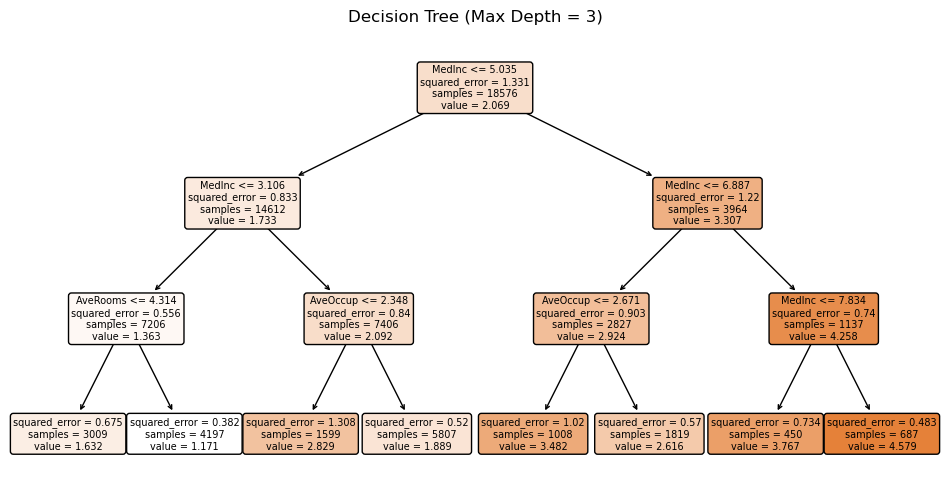

In [8]:
# الخلية 5: عرض شجرة القرار
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# إعداد الشكل
plt.figure(figsize=(12, 6))

# عرض شجرة القرار مع تقليل العمق
plot_tree(decision_tree_model, 
           filled=True, 
           feature_names=california.feature_names, 
           rounded=True)

# عرض الرسم
plt.title("Decision Tree (Max Depth = 3)")
plt.show()
